# Predicting employee retention with logistic regression



> [Dataset](https://www.kaggle.com/giripujar/hr-analytics/data)

## Loading data

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
# loading dataset
human_res = pd.read_csv('HR_comma_sep.csv')

In [3]:
# show all the columns when using method df.head()
pd.set_option('display.max_columns',50)

## Exploratory data analysis

In [4]:
# visualize 5 random rows of the dataset
human_res.sample(5)

satisfaction_level  last_evaluation  number_project  \
8169                 0.51             0.96               3   
11881                0.66             0.66               4   
10274                0.61             0.52               5   
7326                 0.81             0.56               4   
13686                0.67             0.65               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
8169                    149                   4              0     0   
11881                   273                   4              1     0   
10274                   255                   3              0     0   
7326                    262                   3              0     0   
13686                   265                   3              0     0   

       promotion_last_5years   Department  salary  
8169                       0   accounting     low  
11881                      0           IT     low  
10274                      0      support  medium  
7326                       0        RandD  medium  
13686                      0  product_mng  medium

In [5]:
# dataset size
print(f'Number of rows: {human_res.shape[0]}')
print(f'Number of columns: {human_res.shape[1]}')

Number of rows: 14999
Number of columns: 10


In [6]:
# dataset summary
human_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# descriptive statistics
human_res.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [8]:
# show column names
list(human_res.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [9]:
# convert column names to lowercase
human_res.columns = map(str.lower, human_res.columns)

In [10]:
# visualize 2 random rows of the dataset with lowercase column names
human_res.sample(2)

satisfaction_level  last_evaluation  number_project  \
13004                0.61             0.56               4   
2233                 0.70             0.89               6   

       average_montly_hours  time_spend_company  work_accident  left  \
13004                   176                   3              0     0   
2233                    214                   2              0     0   

       promotion_last_5years department  salary  
13004                      0         hr  medium  
2233                       0      sales     low

In [11]:
# show unique values for each variable in the dataset
for col in human_res.columns:
    print(50*'*')
    print(f'Column name: {col}')
    print(human_res[col].unique())

**************************************************
Column name: satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
**************************************************
Column name: last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
*******************************************

As we can see, the variables:
* `satisfaction_level`, `last_evaluation` and `average_montly_hours`  has a distribution of values;
* `number_projet` and `time_spend_company` have less ten 10 unique values each one;
* `work_acident`, `left` and `promotion_last_5years` are binary features (0 or 1);
* `department` is a nominal variable and `salary` an ordinal one.

In [12]:
# variable work_accident 
np.around(human_res.work_accident.value_counts(normalize=True),2)

0    0.86
1    0.14
Name: work_accident, dtype: float64

In [13]:
# variable left
np.around(human_res.left.value_counts(normalize=True),2)

0    0.76
1    0.24
Name: left, dtype: float64

In [14]:
# variable promotion_last_5years
np.around(human_res.promotion_last_5years.value_counts(normalize=True),2)

0    0.98
1    0.02
Name: promotion_last_5years, dtype: float64

We can observe that the percentage of:
* work accidents is 14%;
* workers who left the job is 24%, and
* promotions happening in the last five years is only 2%!

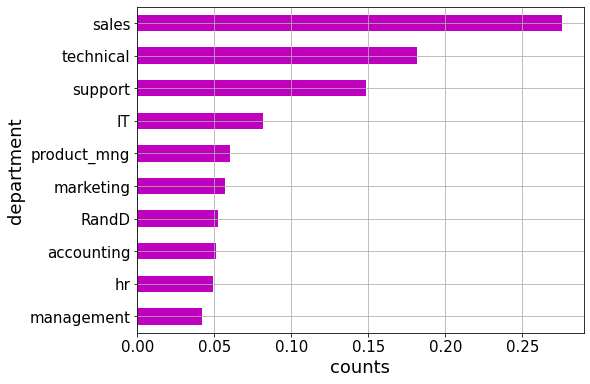

In [15]:
# departments 
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')

counts = human_res['department'].value_counts(normalize=True).sort_values()
counts.plot.barh(width=0.5,fontsize=15, rot=0, figsize=(8,6), color='m')

ax.set_ylabel('department', size=18)
ax.set_xlabel('counts', size=18)
plt.grid()
plt.show()

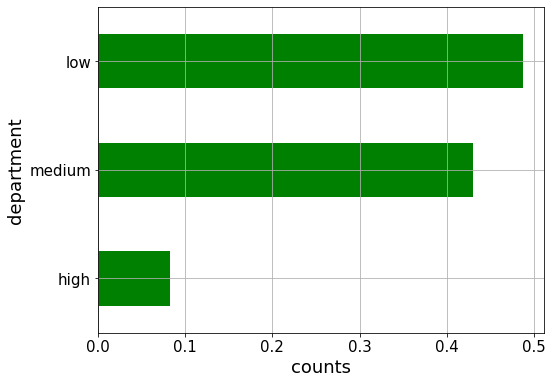

In [16]:
# salaries
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')

counts = human_res['salary'].value_counts(normalize=True).sort_values()
counts.plot.barh(width=0.5,fontsize=15, rot=0, figsize=(8,6), color='g')

ax.set_ylabel('department', size=18)
ax.set_xlabel('counts', size=18)
plt.grid()
plt.show()

In [17]:
# Return the first `n` rows with the largest values in `columns`
## human_res.nlargest(5, 'promotion_last_5years')
#Return the first `n` rows with the smallest values in `columns`
## human_res.nsmallest(5, 'promotion_last_5years')

In [18]:
# create a pairplot using seaborn to visualize relationships in the dataset

#sns.set(style='ticks')
#sns.set_context('notebook')

#sns.pairplot(human_res, diag_kind='auto', markers='+')
#sns.color_palette("bright")
#plt.suptitle("Human resource data", y=1.05, size=30)
#plt.show()

In [19]:
#column_names = human_res.columns
#n_cols = len(column_names)

#num = 0

#fig = plt.figure(figsize=(28,16))

#for col in column_names:
#    num += 1
#    counts = human_res[col].value_counts().sort_index()
#    ax = fig.add_subplot(5, 2, num)
#    counts.plot.bar(width=0.5,fontsize=12)
#    plt.grid()
#fig.subplots_adjust(hspace=0.8, wspace=0.1)
#plt.show()

We can visualize how they the data is distributed and how the variables relate to each other in the scatter plot below.

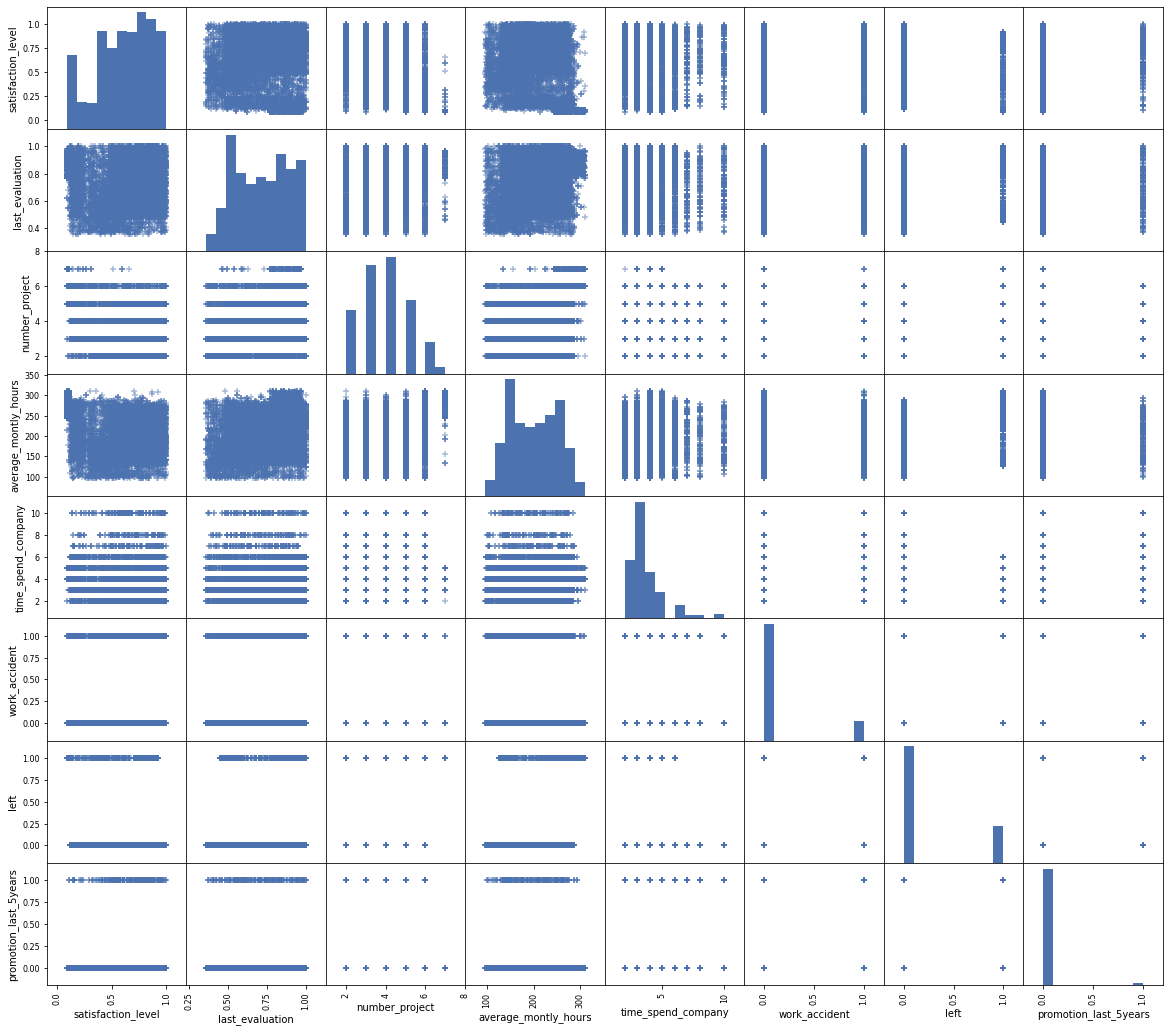

In [17]:
# create a matrix plot using to visualize relationships in the dataset
plt.style.use('seaborn-deep')
scatter_matrix(human_res, diagonal='hist', range_padding=0.4, marker='+', figsize=(20,18))
plt.show()

In [21]:
#human_res['satisfaction_level'].value_counts().sort_index().plot.bar(width=0.5, figsize=(18,6),fontsize=12)
#plt.grid()
#fig.subplots_adjust(hspace=0.8, wspace=0.1)
#plt.show()

In [22]:
#human_res['last_evaluation'].value_counts().sort_index().plot.bar(width=0.5, figsize=(18,6),fontsize=12)
#plt.grid()
#fig.subplots_adjust(hspace=0.8, wspace=0.1)
#plt.show()

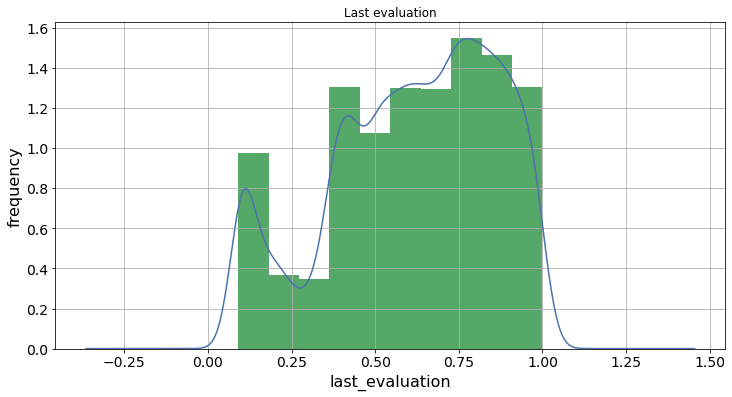

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

dist_sastif = human_res['satisfaction_level']
dist_sastif.plot.kde(ax=ax, legend=False, title='Last evaluation')
dist_sastif.plot.hist(density=True, ax=ax, fontsize=14)
ax.set_ylabel('frequency',size=16)
ax.set_xlabel('last_evaluation', size=16)
plt.grid()

plt.show()

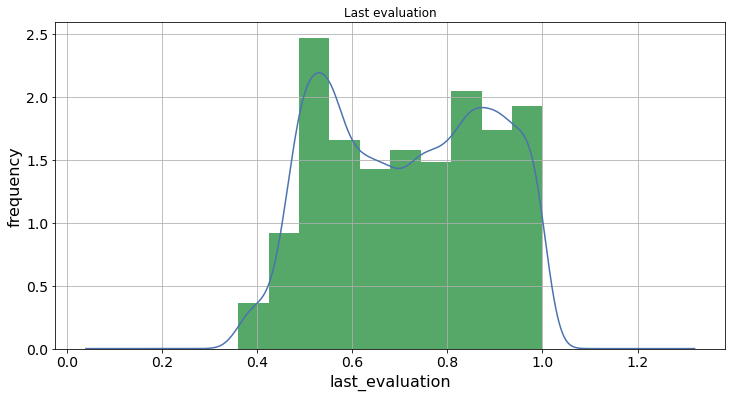

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

dist_last = human_res['last_evaluation']
dist_last.plot.kde(ax=ax, legend=False, title='Last evaluation')
dist_last.plot.hist(density=True, ax=ax, fontsize=14)
ax.set_ylabel('frequency',size=16)
ax.set_xlabel('last_evaluation', size=16)
plt.grid()

plt.show()

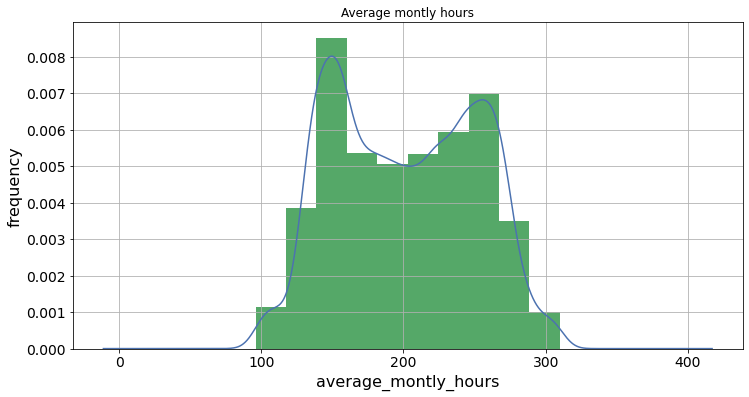

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

dist_month = human_res['average_montly_hours']
dist_month.plot.kde(ax=ax, legend=False, title='Average montly hours')
dist_month.plot.hist(density=True, ax=ax, fontsize=14)
ax.set_ylabel('frequency',size=16)
ax.set_xlabel('average_montly_hours', size=16)
plt.grid()

plt.show()

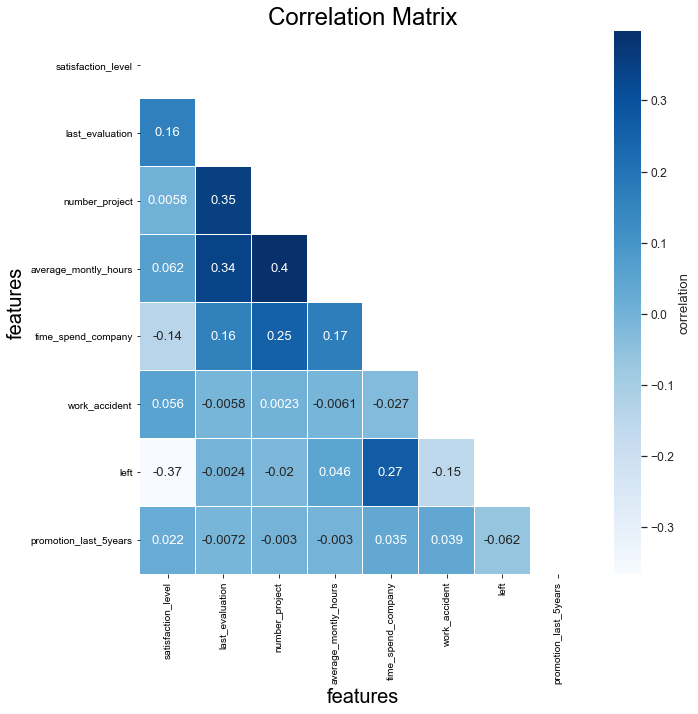

In [21]:
# Correlation matrix completely ignores any non-numeric column. 
fig, ax = plt.subplots(figsize=(10,10))

matrix = np.triu(human_res.corr('spearman'))
sns.set(font_scale=1.1)
sns.heatmap(human_res.corr(method='spearman'), linewidth= 0.1, annot=True, cmap='Blues', cbar_kws={'label': 'correlation'}, mask=matrix)
plt.xlabel("features", size=20)
plt.ylabel("features", size=20)
plt.title("Correlation Matrix", size=24)
plt.show()

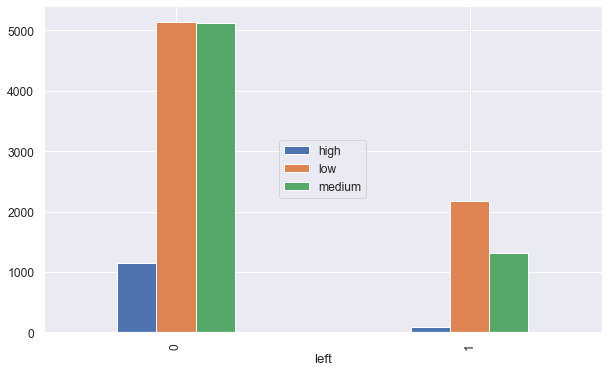

In [22]:
human_res.groupby(['left', 'salary']).size().unstack().plot(kind='bar', width=0.4, stacked=False,figsize=(10,6))
plt.legend(loc='center')
plt.show()

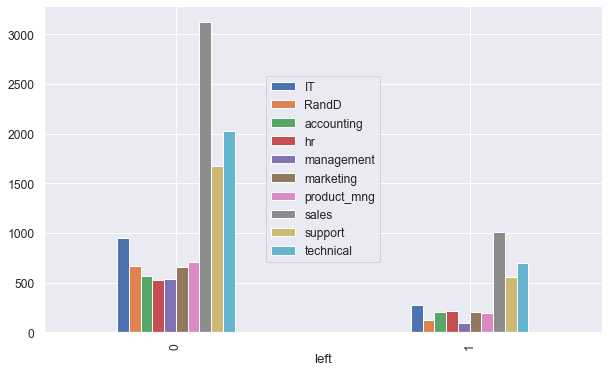

In [23]:
human_res.groupby(['left', 'department']).size().unstack().plot(kind='bar', width=0.4, stacked=False,figsize=(10,6), position=0.5)
plt.legend(loc='center')
plt.show()

In [24]:
# creating a pivot table
#human_res_pivot = pd.pivot_table(human_res, values=['left'], index=['department', 'salary'])
human_res_pivot = pd.pivot_table(human_res, values=['left'], index=['salary'])
human_res_pivot

left
salary          
high    0.066289
low     0.296884
medium  0.204313

* In each department, about 30% of the workers with low salary left the company.

In [25]:
# creating a pivot table
human_res_pivot = pd.pivot_table(human_res, values=['left'], index=['time_spend_company'])
human_res_pivot

left
time_spend_company          
2                   0.016338
3                   0.246159
4                   0.348064
5                   0.565513
6                   0.291086
7                   0.000000
8                   0.000000
10                  0.000000

* Workers leave mostly after five years at the company.

## Converting categorical data

In [26]:
# use one-hot enconding for region to create a new dataset from the original
#metrop_areas_dummy = pd.get_dummies(data=metrop_areas, columns=['region'], prefix='region', prefix_sep='_')
#metrop_areas_dummy.head(3)

human_res_dummies = pd.get_dummies(data = human_res, columns=['salary'], prefix='salary', prefix_sep = '_')
human_res_dummies = pd.get_dummies(data = human_res, columns=['salary','department'], prefix=['salary','dept'], prefix_sep = '_')

In [27]:
human_res_dummies.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   salary_high  salary_low  salary_medium  dept_IT  dept_RandD  \
0            0           1              0        0           0   
1            0           0              1        0           0   
2            0           0              1        0           0   
3            0           1              0        0           0   
4            0           1              0        0           0   

   dept_accounting  dept_hr  dept_management  dept_marketing  \
0                0        0                0               0   
1                0        0                0               0   
2                0        0                0               0   
3                0        0                0               0   
4                0        0                0               0   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0                 0           1             0               0  
1                 0           1             0               0  
2                 0           1             0               0  
3                 0           1             0               0  
4                 0           1             0               0

## Separating features and target variables

In [28]:
# matrix of features
X = human_res_dummies.drop('left', axis = 1)
# target variable vector
y = human_res_dummies['left']

In [29]:
X.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  work_accident  promotion_last_5years  salary_high  \
0                   3              0                      0            0   
1                   6              0                      0            0   

   salary_low  salary_medium  dept_IT  dept_RandD  dept_accounting  dept_hr  \
0           1              0        0           0                0        0   
1           0              1        0           0                0        0   

   dept_management  dept_marketing  dept_product_mng  dept_sales  \
0                0               0                 0           1   
1                0               0                 0           1   

   dept_support  dept_technical  
0             0               0  
1             0               0

In [30]:
y.head(2)

0    1
1    1
Name: left, dtype: int64

In [31]:
print(f'Feature matrix: size: {X.shape} >>> dimension {X.ndim}')
print(f'Target variable vector: size: {y.shape} >>> dimension {y.ndim}')

Feature matrix: size: (14999, 20) >>> dimension 2
Target variable vector: size: (14999,) >>> dimension 1


## Splitting the data into training and test set

In [32]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [33]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 22)

## Model building

In [34]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# build the logistic regression model
model_logreg = LogisticRegression(max_iter = 1000, n_jobs = -1, random_state = 22)

# fit the model
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=22)

## Prediction

In [35]:
# predictions
y_pred = model_logreg.predict(X_test)

## Model performance

### Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[2105  153]
 [ 461  281]]


In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True Positive: ', tp )
print('True Negative: ', tn )
print('False Positive: ', fp )
print('False Negative: ', fn )

True Positive:  281
True Negative:  2105
False Positive:  153
False Negative:  461


### Accuracy

\begin{align}
accuracy = \frac{TP+TN}{TP+TN+FN+FP}
\end{align}

* Accuracy is the number of correct predictions (TP and TN) divided by the number of all samples (all entries of the confusion matrix summed up)

In [38]:
from sklearn.metrics import accuracy_score

print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.7953333333333333


### Recall (Sensitivity): true positive rate
\begin{align}
sensitivity = \frac{TP}{TP+FN}
\end{align}

* Recall measures how many of the positive samples are captured by the positive predictions.
* Recall is used as performance metric when we need to identify all positive samples. 
* Other names for recall are sensitivity, hit rate, or true positive rate (TPR).
* Lower sensitivity: higher false negative rate (type II errors)

In [39]:
from sklearn.metrics import recall_score

print('Recall/Sensitivity: ', recall_score(y_test, y_pred))

Recall/Sensitivity:  0.37870619946091644


### Precision

\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

* Precision measures how many of the samples predicted as positive are actually positive.
* Precision is used as a performance metric when the goal is to limit the number of false positives.

In [40]:
from sklearn.metrics import precision_score

print('Precision: ',precision_score(y_test, y_pred))

Precision:  0.6474654377880185


### Specificity: true negative rate
* `sklearn` does not have an inbuild function for Specificity.
* But by adding parameter `pos_label = 0` to the `recall_score()` function, we treat that as the positive class, and hence gives the correct output
* Lower specificity: higher false positive rate (type I error)

\begin{align}
specificity = \frac{TN}{TN+FP}
\end{align}

In [41]:
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))

Specificity with recall pos label=0:  0.9322409211691762


In [42]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.9322409211691762


### F1 Score
* It is the harmonic mean of precision and recall
* This particular variant is also known as the f-score or f-measure. 
* As it takes precision and recall into account, it can be a better measure than accuracy on imbalanced binary classification datasets.
* Using the f-score for evaluation, we summarized the predictive performance again in one number. However, the f-score seems to capture our intuition of what makes a good model much better than accuracy did. 
* A disadvantage of the f-score, however, is that it is harder to interpret and explain than accuracy

\begin{align}
precision = \frac{2 \cdot precision \cdot recall}{precision+recall}
\end{align}

In [43]:
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(y_test, y_pred))

F1 Score:  0.47789115646258506


### Matthews Correlation Coefficient
* It is used as a measure of the quality of binary (two-class) classifications.
* The coefficient takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes
* The MCC is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. A coefficient of +1 represents a perfect prediction, 0 no better than random prediction and −1 indicates total disagreement between prediction and observation.

\begin{align}
MCC = \frac{(TP \cdot TN)-(FP \cdot FN)}{\sqrt{\; (TP+FP)\; (TP+FN)\; (TN+FP)\; (TN+FN)}}
\end{align}

In [44]:
from sklearn.metrics import matthews_corrcoef

print("MCC Score: ", matthews_corrcoef(y_test, y_pred))

MCC Score:  0.38139699790880244


In [45]:
from sklearn.metrics import classification_report

# comprehensive summary of precision, recall, and f1-score
print(classification_report(y_test, y_pred, target_names=["not left", "left"]))

              precision    recall  f1-score   support

    not left       0.82      0.93      0.87      2258
        left       0.65      0.38      0.48       742

    accuracy                           0.80      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000



### Receiver operating characteristics (ROC) and area under the curve (AUC)

#### ROC
* It is commonly used to analyze the behavior of classifiers at different thresholds 
* The ROC curve considers all possible thresholds for a given classifier, and shows the false positive rate (FPR) against the true positive rate (TPR).
* The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR) (any increase in sensitivity will be accompanied by a decrease in specificity).
* Classifiers that give curves closer to the top-left corner indicate a better performance. 
* As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). 
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
* Note that the ROC does not depend on the class distribution. This makes it useful for evaluating classifiers predicting rare events such as diseases or disasters. In contrast, evaluating performance using accuracy (TP + TN)/(TP + TN + FN + FP) would favor classifiers that always predict a negative outcome for rare events.

#### AUC
* To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. 
* One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC. 
* It is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance, i.e. it is equivalent to the two sample Wilcoxon rank-sum statistic.
* A classifier with high AUC can occassionally score worse in a specific region than another classifier with lower AUC. But in practice, the AUC performs well as a general measure of predictive accuracy.
* The best possible AUC is 1 while the worst is 0.5 (the 45 degrees random line). 
* Any value less than 0.5 means we can simply do the exact opposite of what the model recommends to get the value back above 0.5.

In [53]:
#from sklearn.metrics import plot_roc_curve

#plot_roc_curve(model_logreg, X_test, y_test)
#plt.plot([0, 1], [0, 1],'r--')
#plt.show()

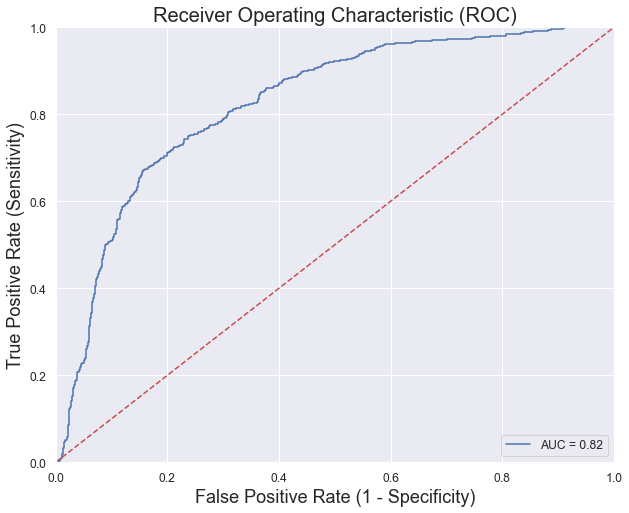

In [46]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model_logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method: plt

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', size=18)
plt.xlabel('False Positive Rate (1 - Specificity)', size=18)
plt.show()

### Probability distribution of classes

In [47]:
y_test.shape, preds.shape

((3000,), (3000,))

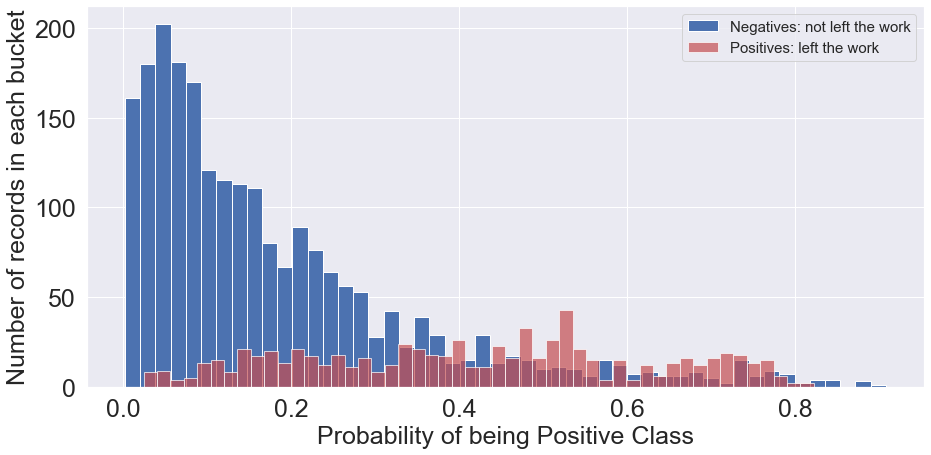

In [48]:
# predicted probabilities

plt.figure(figsize=(15,7))
plt.hist(preds[y_test == 0], bins=50, label='Negatives: not left the work')
plt.hist(preds[y_test == 1], bins=50, label='Positives: left the work', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

## Hiperparameter tuning with `RandomizedSearchCV()`

In [57]:
from pprint import pprint

# show used parameters for LogisticRegression()
logreg = LogisticRegression()
print('Parameter currently in use:\n')
pprint(logreg.get_params())

Parameter currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [64]:
from sklearn.model_selection import RandomizedSearchCV

# create hyperparameters space
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = ['weight', 'balanced']
fit_intercept = [True, False]
intercept_scaling = [0.1, 0.4, 0.8]
max_iter = [1000]
penalty = ['l1', 'l2']
solver =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# # Create hyperparameter options
hyperparameters = {'C': c,
                   'class_weight': class_weight,
                   'fit_intercept': fit_intercept,
                   'intercept_scaling': intercept_scaling,
                   'max_iter': max_iter,
                   'penalty': penalty,
                   'solver': solver}

logreg_random = RandomizedSearchCV(estimator = logreg, 
                               param_distributions = hyperparameters, 
                               n_iter = 1000, cv = 5, 
                               verbose = 2, 
                               random_state = 22, n_jobs = -1)

logreg_random.fit(X_train, y_train)

C:\Users\vechi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 840 is smaller than n_iter=1000. Running 840 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 20.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=1000, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': ['weight', 'balanced'],
                                        'fit_intercept': [True, False],


In [66]:
logreg_random.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'max_iter': 1000,
 'intercept_scaling': 0.1,
 'fit_intercept': True,
 'class_weight': 'weight',
 'C': 100}

### Model building (tuned model)

In [69]:
tuned_model_logreg = LogisticRegression(max_iter = 1000, intercept_scaling = 0.1, class_weight = 'weight', C = 100, n_jobs = -1, random_state = 22)
    
# fit the model
tuned_model_logreg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='weight', dual=False, fit_intercept=True,
                   intercept_scaling=0.1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=22,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### Prediction

In [70]:
y_pred_tuned = tuned_model_logreg.predict(X_test)

### Model performance

In [71]:
confusion = confusion_matrix(y_test, y_pred_tuned)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[2104  154]
 [ 459  283]]


In [187]:
print('Comparing logistic regression models')
print(f'                        Tunned     Default')
print(f'Accuracy: {np.around(accuracy_score(y_test, y_pred_tuned),4):20} {np.around(accuracy_score(y_test, y_pred),4):10}')
print(f'Sensitivity:  {np.around(recall_score(y_test, y_pred_tuned),4):16} {np.around(recall_score(y_test, y_pred),4):10}')
print(f'Precision:  {np.around(precision_score(y_test, y_pred_tuned),4):18} {np.around(precision_score(y_test, y_pred),4):10}')
print(f'Specificity: {np.around(recall_score(y_test, y_pred_tuned, pos_label=0),4):17} {np.around(recall_score(y_test, y_pred, pos_label=0),4):10}')
print(f'F1 Score:  {np.around(f1_score(y_test, y_pred_tuned),4):19} {np.around(f1_score(y_test, y_pred),4):10}')
print(f'MCC Score: {np.around(matthews_corrcoef(y_test, y_pred_tuned), 4):19} {np.around(matthews_corrcoef(y_test, y_pred), 4):10}')

Comparing logistic regression models
                        Tunned     Default
Accuracy:               0.7957     0.7953
Sensitivity:            0.3814     0.3787
Precision:              0.6476     0.6475
Specificity:            0.9318     0.9322
F1 Score:               0.4801     0.4779
MCC Score:              0.3831     0.3814


### ROC curve and AUC

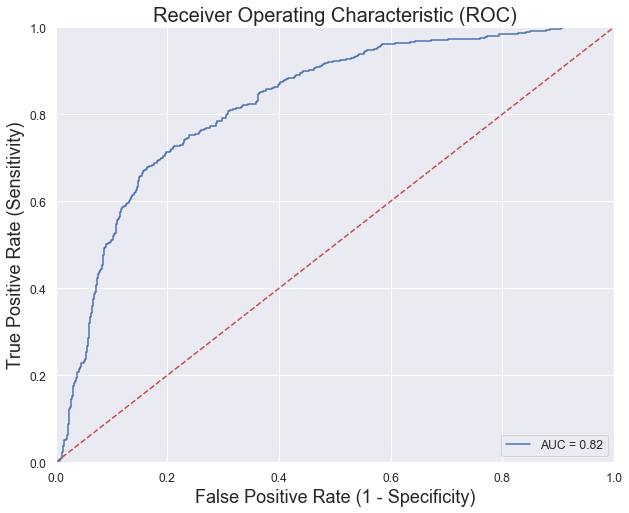

In [81]:
# calculate the fpr and tpr for all thresholds of the classification
probs = tuned_model_logreg.predict_proba(X_test)
preds = probs[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds)
roc_auc2 = metrics.auc(fpr2, tpr2)

# method: plt

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', size=18)
plt.xlabel('False Positive Rate (1 - Specificity)', size=18)
plt.show()

## Hiperparameter tuning with `GridSearchCV()`

In [189]:
from sklearn.model_selection import GridSearchCV

# create hyperparameters space
c = [0.001, 0.01, 0.1, 1, 10, 10, 1000]
class_weight = ['weight', 'balanced']
fit_intercept = [True, False]
intercept_scaling = [0.1, 0.4, 0.8]
max_iter = [1000]
penalty = ['l1', 'l2']
solver =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# # Create hyperparameter options
hyperparameters = {'C': c,
                   'class_weight': class_weight,
                   'fit_intercept': fit_intercept,
                   'intercept_scaling': intercept_scaling,
                   'max_iter': max_iter,
                   'penalty': penalty,
                   'solver': solver}

logreg_grid = GridSearchCV(estimator = logreg, 
                               param_grid = hyperparameters, 
                               cv = 5, 
                               verbose = 2, 
                               n_jobs = -1)

logreg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1522 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2049 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2656 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3345 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 4114 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 18.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10, 1000],
                         'class_weight': ['weight', 'balanced'],
                         'fit_intercept': [True, False],
                         'intercept_scaling': [0.1, 0.4, 0.8],
                         'max_iter': [1000], 'penalty': ['l1', 'l2'],
                         'solver

In [194]:
logreg_grid.best_params_

{'C': 10,
 'class_weight': 'weight',
 'fit_intercept': False,
 'intercept_scaling': 0.1,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'lbfgs'}

`RandomizedSearchCV()` $\times$ `GridSearchCV()`

In [195]:
tuned_model_logreg_2 = LogisticRegression(max_iter = 1000, intercept_scaling = 0.1, class_weight = 'weight', C = 10, n_jobs = -1, random_state = 22)
    
# fit the model
tuned_model_logreg_2.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='weight', dual=False, fit_intercept=True,
                   intercept_scaling=0.1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=22,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [196]:
y_pred_tuned = tuned_model_logreg.predict(X_test)

In [197]:
confusion = confusion_matrix(y_test, y_pred_tuned)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[2104  154]
 [ 459  283]]


In [198]:
print('Comparing logistic regression models')
print(f'                        Tunned     Default')
print(f'Accuracy: {np.around(accuracy_score(y_test, y_pred_tuned),4):20} {np.around(accuracy_score(y_test, y_pred),4):10}')
print(f'Sensitivity:  {np.around(recall_score(y_test, y_pred_tuned),4):16} {np.around(recall_score(y_test, y_pred),4):10}')
print(f'Precision:  {np.around(precision_score(y_test, y_pred_tuned),4):18} {np.around(precision_score(y_test, y_pred),4):10}')
print(f'Specificity: {np.around(recall_score(y_test, y_pred_tuned, pos_label=0),4):17} {np.around(recall_score(y_test, y_pred, pos_label=0),4):10}')
print(f'F1 Score:  {np.around(f1_score(y_test, y_pred_tuned),4):19} {np.around(f1_score(y_test, y_pred),4):10}')
print(f'MCC Score: {np.around(matthews_corrcoef(y_test, y_pred_tuned), 4):19} {np.around(matthews_corrcoef(y_test, y_pred), 4):10}')

Comparing logistic regression models
                        Tunned     Default
Accuracy:               0.7957     0.7953
Sensitivity:            0.3814     0.3787
Precision:              0.6476     0.6475
Specificity:            0.9318     0.9322
F1 Score:               0.4801     0.4779
MCC Score:              0.3831     0.3814


## Regression tree model

In [55]:
# build the decision tree 
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint

# show used parameters for DecisionTreeClassifier()
model_tree = DecisionTreeClassifier()
print('Parameter currently in use:\n')
pprint(model_tree.get_params())

Parameter currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [57]:
from sklearn.model_selection import GridSearchCV

# create hyperparameters space
max_depth = [int(x) for x in np.linspace(start=1, stop=15, num=15)]
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
class_weight = ['weight', 'balanced']
min_impurity_decrease = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.4]


# # Create hyperparameter options
hyperparameters = {'max_depth': max_depth,
                   'criterion': criterion,
                   'splitter': spliter,
                   'class_weight': class_weight,
                   'min_impurity_decrease': min_impurity_decrease}

model_tree_grid = GridSearchCV(estimator = model_tree, 
                               param_grid = hyperparameters, 
                               cv = 5, 
                               verbose = 2, 
                               n_jobs = -1)

#model_tree_grid = RandomizedSearchCV(estimator = model_tree, 
#                               param_distributions = hyperparameters, 
#                               n_iter = 2000, cv = 5, 
#                               verbose = 2, 
#                               random_state = 22, n_jobs = -1)


model_tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 6600 out of 6600 | elapsed:   20.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['weight', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_impurity_decrease': [0.0005, 0.001, 0.002, 0.005,
                                                   0.01, 0.02, 0.05, 0.1, 0.15,
                                                   0.2, 0.4],
                         'splitter': ['best', 'random']},
             verbose=2)

In [58]:
#import sklearn
# sklearn.__version__

model_tree_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_impurity_decrease': 0.0005,
 'splitter': 'best'}

In [60]:
# show used parameters for DecisionTreeClassifier()
model_tree_tuned = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10, min_impurity_decrease=0.0005, splitter='best')

# fit the model
model_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_impurity_decrease=0.0005)

In [62]:
y_pred_tuned = model_tree_tuned.predict(X_test)

In [63]:
confusion = confusion_matrix(y_test, y_pred_tuned)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[2234   24]
 [  46  696]]


In [64]:
print('Comparing logistic regression models')
print(f'                        Tunned     Default')
print(f'Accuracy: {np.around(accuracy_score(y_test, y_pred_tuned),4):20} {np.around(accuracy_score(y_test, y_pred),4):10}')
print(f'Sensitivity:  {np.around(recall_score(y_test, y_pred_tuned),4):16} {np.around(recall_score(y_test, y_pred),4):10}')
print(f'Precision:  {np.around(precision_score(y_test, y_pred_tuned),4):18} {np.around(precision_score(y_test, y_pred),4):10}')
print(f'Specificity: {np.around(recall_score(y_test, y_pred_tuned, pos_label=0),4):17} {np.around(recall_score(y_test, y_pred, pos_label=0),4):10}')
print(f'F1 Score:  {np.around(f1_score(y_test, y_pred_tuned),4):19} {np.around(f1_score(y_test, y_pred),4):10}')
print(f'MCC Score: {np.around(matthews_corrcoef(y_test, y_pred_tuned), 4):19} {np.around(matthews_corrcoef(y_test, y_pred), 4):10}')

Comparing logistic regression models
                        Tunned     Default
Accuracy:               0.9767     0.7953
Sensitivity:             0.938     0.3787
Precision:              0.9667     0.6475
Specificity:            0.9894     0.9322
F1 Score:               0.9521     0.4779
MCC Score:              0.9369     0.3814


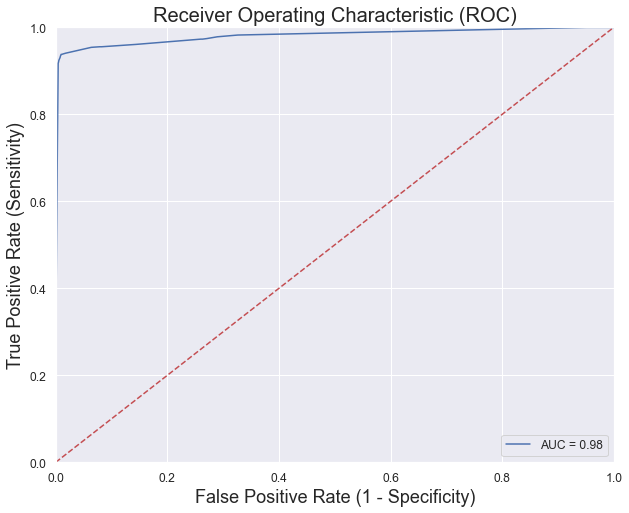

In [66]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model_tree_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds)
roc_auc3 = metrics.auc(fpr3, tpr3)

# method: plt

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', size=18)
plt.xlabel('False Positive Rate (1 - Specificity)', size=18)
plt.show()

In [67]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(model_tree_tuned, out_file='model_tree_tuned.dot', 
                          feature_names=X_test.columns,  
#                          class_names=['0', '1'],  
                          class_names=['no left', 'left'],
                          filled=True, rounded=True,  
                          special_characters=True) 

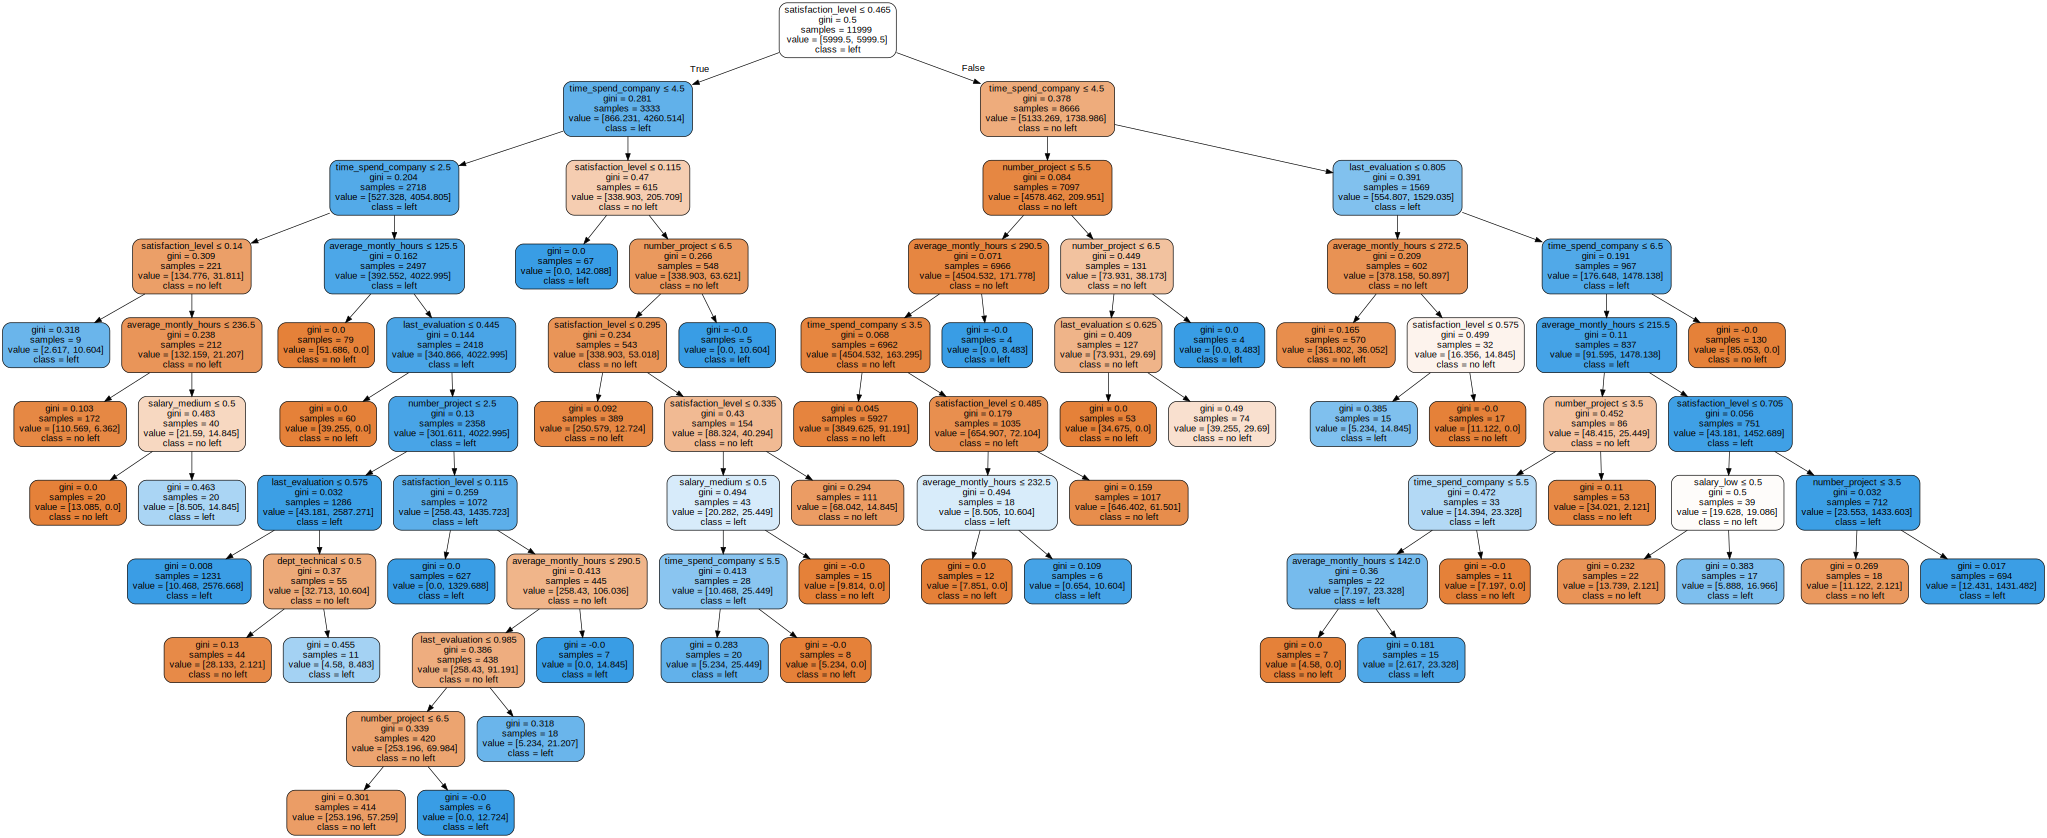

In [68]:
# visualize the graph for the tree
with open("model_tree_tuned.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Model tree 2

In [79]:
# show used parameters for DecisionTreeClassifier()
model_tree_tuned = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3, min_impurity_decrease=0.0005, splitter='best')

# fit the model
model_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_impurity_decrease=0.0005)

In [80]:
y_pred_tuned = model_tree_tuned.predict(X_test)

In [81]:
confusion = confusion_matrix(y_test, y_pred_tuned)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[2022  236]
 [  50  692]]


In [82]:
print('Comparing logistic regression models')
print(f'                        Tunned     Default')
print(f'Accuracy: {np.around(accuracy_score(y_test, y_pred_tuned),4):20} {np.around(accuracy_score(y_test, y_pred),4):10}')
print(f'Sensitivity:  {np.around(recall_score(y_test, y_pred_tuned),4):16} {np.around(recall_score(y_test, y_pred),4):10}')
print(f'Precision:  {np.around(precision_score(y_test, y_pred_tuned),4):18} {np.around(precision_score(y_test, y_pred),4):10}')
print(f'Specificity: {np.around(recall_score(y_test, y_pred_tuned, pos_label=0),4):17} {np.around(recall_score(y_test, y_pred, pos_label=0),4):10}')
print(f'F1 Score:  {np.around(f1_score(y_test, y_pred_tuned),4):19} {np.around(f1_score(y_test, y_pred),4):10}')
print(f'MCC Score: {np.around(matthews_corrcoef(y_test, y_pred_tuned), 4):19} {np.around(matthews_corrcoef(y_test, y_pred), 4):10}')

Comparing logistic regression models
                        Tunned     Default
Accuracy:               0.9047     0.7953
Sensitivity:            0.9326     0.3787
Precision:              0.7457     0.6475
Specificity:            0.8955     0.9322
F1 Score:               0.8287     0.4779
MCC Score:               0.773     0.3814


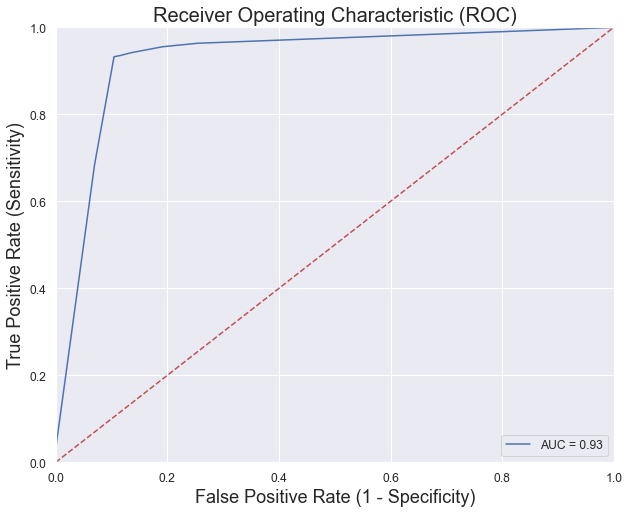

In [83]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model_tree_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds)
roc_auc3 = metrics.auc(fpr3, tpr3)

# method: plt

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)', size=18)
plt.xlabel('False Positive Rate (1 - Specificity)', size=18)
plt.show()

In [84]:
from sklearn.tree import export_graphviz
import graphviz

# generate the graph for the tree
dot_data= export_graphviz(model_tree_tuned, out_file='model_tree_tuned2.dot', 
                          feature_names=X_test.columns,  
#                          class_names=['0', '1'],  
                          class_names=['no left', 'left'],
                          filled=True, rounded=True,  
                          special_characters=True) 

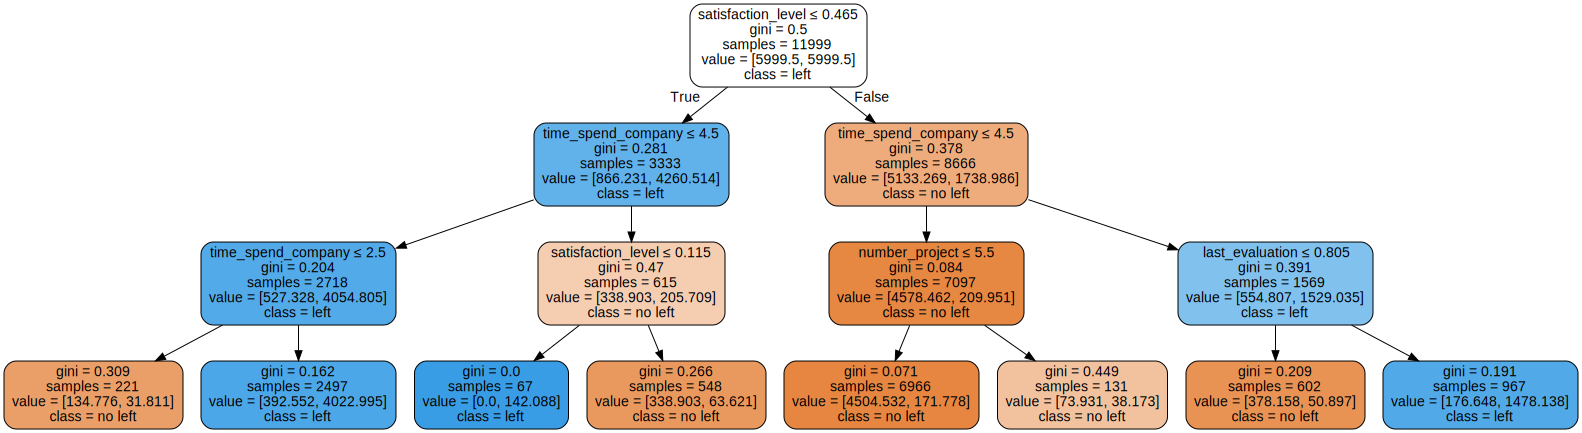

In [85]:
# visualize the graph for the tree
with open("model_tree_tuned2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)